In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns

In [2]:
out_dir = '/data1/chanj3/LUAS.multiome.results/epigenetic/TCGA_modeling/out'
logreg_gene_sets = [
    'hvp_50000',
    'hvp_20000',
    'hvp_10000',
    'hvp_5000',
    'fdr_1e-6_top_2500_per',
    'fdr_1e-6_top_1000_per',
]
gene_set_to_metrics = {}
for gene_set in logreg_gene_sets:
    with open(f'{out_dir}/log_reg/luad_vs_lusc_{gene_set}/cv_metrics.pkl', 'rb') as f:
        gene_set_to_metrics[gene_set] = pickle.load(f)

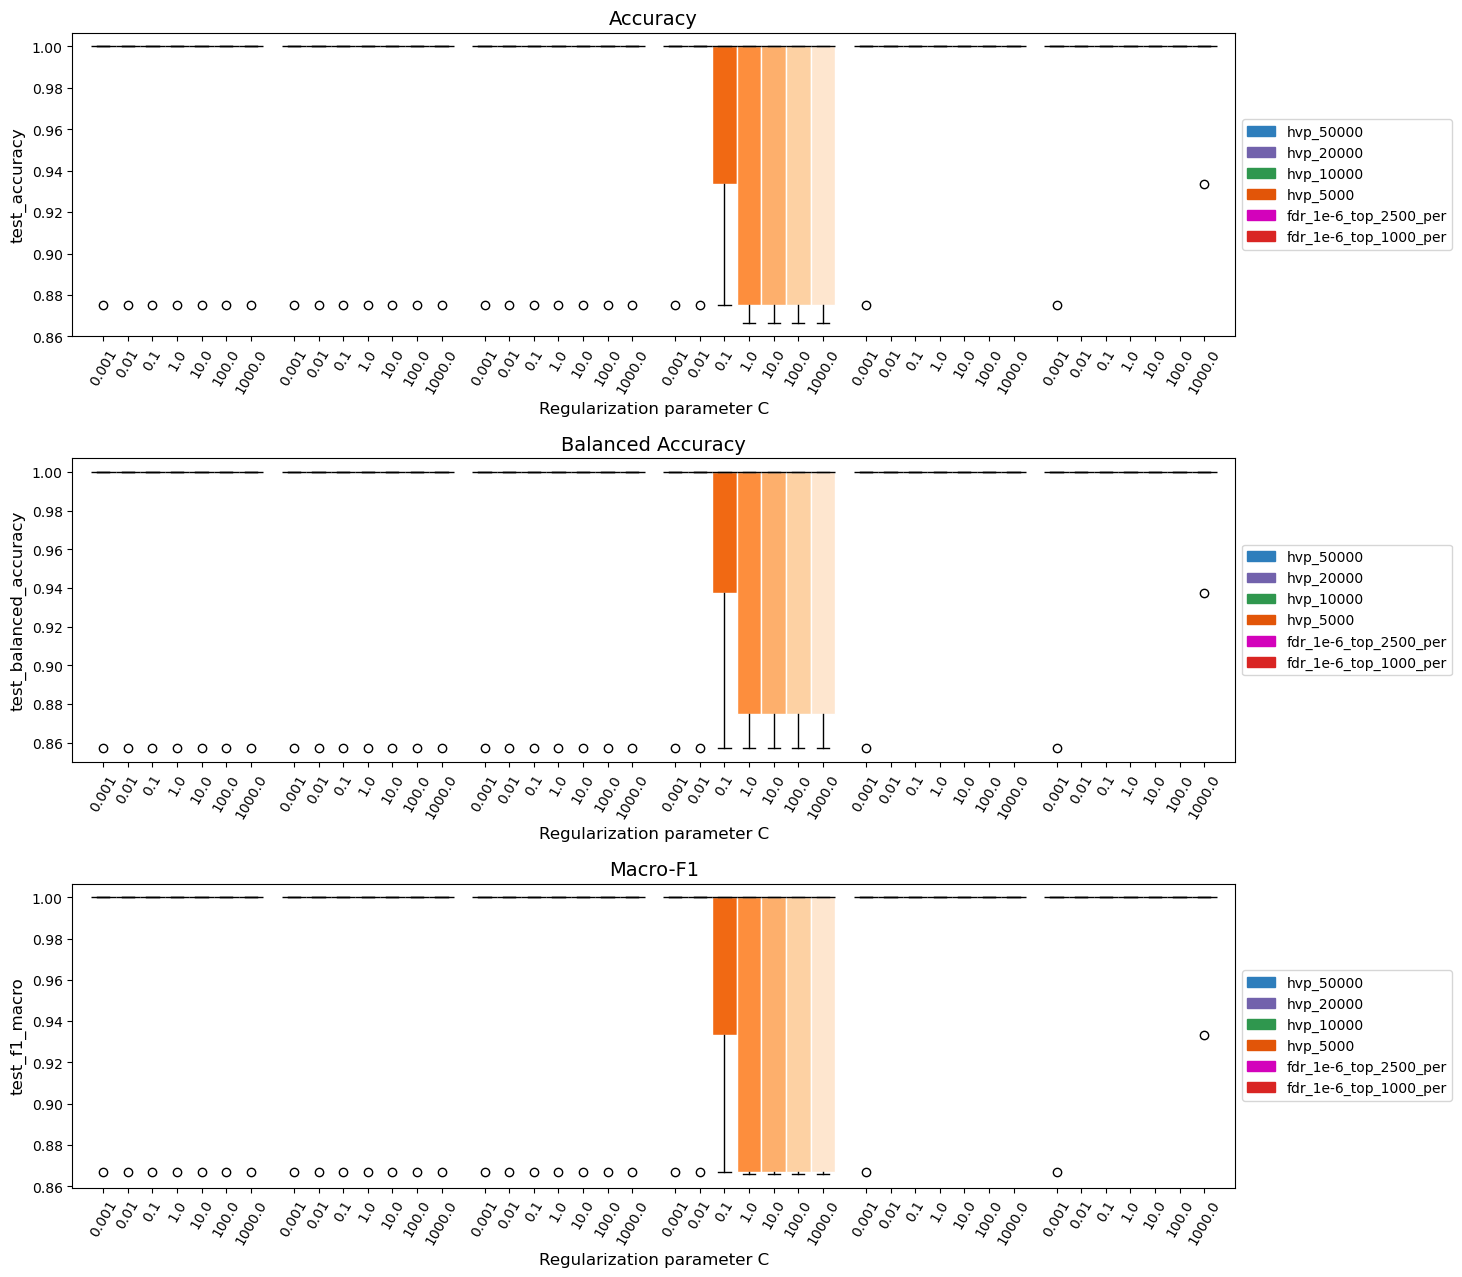

In [3]:
metrics = ['test_accuracy', 'test_balanced_accuracy', 'test_f1_macro']
titles = ['Accuracy', 'Balanced Accuracy', 'Macro-F1']
magenta_cmap = mpl.colors.LinearSegmentedColormap.from_list('magenta_seq', ['#750068', '#DE02C5', '#F57AE7', '#FFFFFF'])
cmaps = ['Blues_r', 'Purples_r', 'Greens_r', 'Oranges_r', magenta_cmap, 'Reds_r']
fig, axes = plt.subplots(3, 1, figsize=(15, 15), gridspec_kw={'hspace': 0.4})

width = 0.4
intra_spacing = 0.4
inter_spacing = 0.7

for i, metric in enumerate(metrics):
    pos = 0
    all_positions = []
    ax = axes[i]
    metric = metrics[i]
    title = titles[i]
    legend_handles = []
    for gene_set, cmap in zip(logreg_gene_sets, cmaps):
        if isinstance(cmap, str):
            cmap = plt.get_cmap(cmap)
        C_to_metric_vals = gene_set_to_metrics[gene_set]

        Cs = sorted(list(C_to_metric_vals.keys()))
        norm = mpl.colors.Normalize(vmin=-1, vmax=len(Cs))
        gene_set_colors = [cmap(norm(i)) for i in range(len(Cs))]

        x = [C_to_metric_vals[C][metric] for C in Cs]
        positions = [pos + i*intra_spacing for i in range(len(Cs))]
        bp_dict = ax.boxplot(x, positions=positions, patch_artist=True, widths=width)
        all_positions.extend(positions)
        pos = max(positions) + inter_spacing

        # Color each box to match its C
        for box, fc in zip(bp_dict['boxes'], gene_set_colors):
            box.set(facecolor=fc, edgecolor='white', linewidth=1.0)
        # Make whiskers, caps, medians readable
        for elem in ('whiskers', 'caps', 'medians'):
            for artist in bp_dict[elem]:
                artist.set(color='black', linewidth=1.0)
        legend_handles.append(mpl.patches.Patch(label=gene_set, color=cmap(0.3)))
    ax.legend(handles=legend_handles, bbox_to_anchor=(1, 0.5), loc='center left')
    ax.set_xticks(all_positions, Cs * len(logreg_gene_sets), rotation=60)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Regularization parameter C', fontsize=12)
fig.savefig(f'{out_dir}/luad_vs_lusc_log_reg_cv_metrics.png', bbox_inches='tight', dpi=200)
plt.show()